**Author:** Brayden Guelich
**Metric:** Number of Steps Per Neighborhood

I chose this metric to measure the number of steps throughout the neighborhoods of Pittbsurgh. As I was born and raised in the area, I was very curious to see if my personal experience would have any consistency with official data. For this project, I ranked the neighborhoods with more steps to be lower on the list, and the ones with fewer on the upper end. 

In [2]:
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt

In [3]:
steps_data = pd.read_csv("https://data.wprdc.org/datastore/dump/43f40ca4-2211-4a12-8b4f-4d052662bb64")


In [4]:
steps_data

,id,name,maintenance_responsibility,installed,material,length,number_of_steps,schools_count,school_score,total_population,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,326501686,10 Wakefield St,3rd Division,NaN,Concrete,53.0,8.0,0.0,100.0,367.0,...,South Oakland,3.0,4,42003040900,3,4,4,2-11,40.430926,-79.957090
1,527853474,1005 St Martin St,4th Division,NaN,Concrete,33.0,24.0,NaN,NaN,NaN,...,South Side Slopes,3.0,17,42003170600,3,17,3,4-6,40.422410,-79.988215
2,1074700399,1017 St Martin St,4th Division,NaN,Concrete,52.0,4.0,NaN,NaN,NaN,...,South Side Slopes,3.0,17,42003170600,3,17,3,4-6,40.422471,-79.987604
3,50987987,30th St from Bigelow Blvd to Leander St,3rd Division,1948-01-01,Concrete,106.0,106.0,0.0,100.0,235.0,...,Bedford Dwellings,7.0,6,42003060500,3,6,2,2-24,40.454787,-79.968453
4,173445306,30th St from Paulowna to Bigelow Blvd,6th Division,1948-01-01,Concrete,204.0,85.0,1.0,4.0,422.0,...,Polish Hill,7.0,6,42003060500,6,6,2,2-6,40.455470,-79.968725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,436649994,Frick Park 7,Parks - Eastern,NaN,Stone,NaN,NaN,NaN,NaN,NaN,...,Point Breeze,9.0,14,42003981100,3,14,4,3-14,40.442094,-79.900003
1010,1118777905,Niagara Park,Parks - Schenley,NaN,Concrete,NaN,NaN,NaN,NaN,NaN,...,South Oakland,3.0,4,42003040900,3,4,4,2-10,40.434592,-79.960035
1011,804870832,Wightman Park 1,Parks - Eastern,NaN,Concrete,NaN,NaN,NaN,NaN,NaN,...,Squirrel Hill North,8.0,14,42003140300,3,14,4,2-8,40.443513,-79.927747
1012,455122184,Wightman Park 2,Parks - Eastern,NaN,Concrete,NaN,NaN,NaN,NaN,NaN,...,Squirrel Hill North,8.0,14,42003140300,3,14,4,2-18,40.443099,-79.926734


In [5]:
steps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          1014 non-null   int64  
 1   name                        1014 non-null   object 
 2   maintenance_responsibility  999 non-null    object 
 3   installed                   450 non-null    object 
 4   material                    1009 non-null   object 
 5   length                      853 non-null    float64
 6   number_of_steps             736 non-null    float64
 7   schools_count               556 non-null    float64
 8   school_score                556 non-null    float64
 9   total_population            556 non-null    float64
 10  transit_rider_count         556 non-null    float64
 11  transit_score               556 non-null    float64
 12  detour_score                556 non-null    float64
 13  overall_score               558 n

In [6]:
neigh = steps_data['neighborhood'].unique()
print(neigh)

['South Oakland' 'South Side Slopes' 'Bedford Dwellings' 'Polish Hill'
 'Upper Lawrenceville' 'Stanton Heights' 'Squirrel Hill South' 'Sheraden'
 'Greenfield' 'West Oakland' 'Upper Hill' 'Beechview'
 'Mount Oliver Borough' 'Allentown' 'Elliott' 'Banksville' 'Carrick'
 'Spring Garden' 'Marshall-Shadeland' 'California-Kirkbride' 'Morningside'
 'Brookline' 'Troy Hill' 'Brighton Heights' 'Squirrel Hill North'
 'Beltzhoover' 'Hazelwood' 'Strip District' 'Perry South' 'Perry North'
 'Central Oakland' 'Spring Hill-City View' 'Knoxville' 'Homewood North'
 'Mt. Oliver' 'North Oakland' 'Bon Air' 'Middle Hill' 'Fineview'
 'Bloomfield' 'Crafton Heights' 'East Allegheny' 'Arlington'
 'Mount Washington' 'Westwood' 'Overbrook' 'East Hills'
 'Central Northside' 'Point Breeze' 'Highland Park' 'Chartiers City'
 'West End' 'Ridgemont' 'Terrace Village' 'Garfield' 'Duquesne Heights'
 'St. Clair' 'Esplen' 'Oakwood' 'Lincoln Place' 'Central Lawrenceville'
 'Windgap' 'Glen Hazel' 'Lincoln-Lemington-Belmar' '

In [7]:
s = []
n = []
z = []
#fills array of steps 
for i in range(1010):
    s.append(steps_data.loc[i,'number_of_steps'])
#print(s)
s=s[-1010:]
#fills array of neighborhoods
for j in range(1010):
    n.append(steps_data.loc[j,'neighborhood'])
#print(n)
n=n[-1010:]

for i in range (1010):
    if str(s[i]).lower() == 'nan':
        s[i] = 0
    s[i] = int(s[i])
#fills array of pairs 
for i in range (1010):
    z.append([n[i],s[i]])
    
z=z[2:-1]
z.sort(key=lambda x:x[1]) 

#print(z)

In [8]:
#Adds all Steps in each neighborhood
stepsum = 0
finalList = []
for x in (neigh):
    for i in (z):
        if i[0] == x:
            stepsum += i[1]
    finalList.append([x,stepsum]) 
    stepsum = 0
finalList.sort(key=lambda x:x[1])
print(finalList)
    


[['Manchester', 0], ['Lower Lawrenceville', 0], ['Regent Square', 0], ['South Shore', 4], ['Mount Oliver Borough', 9], ['Central Lawrenceville', 9], ['Windgap', 16], ['Allegheny Center', 28], ['Esplen', 48], ['Shadyside', 50], ['East Carnegie', 52], ['St. Clair', 53], ['South Side Flats', 56], ['Bon Air', 57], ['Strip District', 65], ['Highland Park', 66], ['North Oakland', 72], ['Ridgemont', 76], ['Chartiers City', 81], ['Crawford-Roberts', 88], ['Larimer', 93], ['Squirrel Hill South', 105], ['Terrace Village', 106], ['Mt. Oliver', 116], ['West End', 127], ['Oakwood', 129], ['Knoxville', 151], ['Glen Hazel', 151], ['Point Breeze', 156], ['Bloomfield', 161], ['East Hills', 169], ['Bluff', 179], ['Bedford Dwellings', 234], ['Lincoln Place', 248], ['Squirrel Hill North', 252], ['South Oakland', 330], ['Morningside', 333], ['Central Northside', 333], ['Banksville', 338], ['Allentown', 358], ['Central Oakland', 361], ['Beltzhoover', 391], ['Arlington', 440], ['Westwood', 463], ['Crafton He

In [9]:
# Seperating Matched Data by Index of Each Element
sortedSteps = []
for x in (finalList):
    sortedSteps.append(x[1])
print(sortedSteps)
sortedNeigh = []
for x in (finalList):
    sortedNeigh.append(x[0])
print(sortedNeigh)

[0, 0, 0, 4, 9, 9, 16, 28, 48, 50, 52, 53, 56, 57, 65, 66, 72, 76, 81, 88, 93, 105, 106, 116, 127, 129, 151, 151, 156, 161, 169, 179, 234, 248, 252, 330, 333, 333, 338, 358, 361, 391, 440, 463, 478, 485, 487, 495, 497, 504, 511, 526, 565, 664, 672, 742, 774, 783, 794, 848, 887, 946, 950, 1012, 1037, 1115, 1121, 1246, 1349, 1363, 1374, 1472, 1843, 2473, 4051]
['Manchester', 'Lower Lawrenceville', 'Regent Square', 'South Shore', 'Mount Oliver Borough', 'Central Lawrenceville', 'Windgap', 'Allegheny Center', 'Esplen', 'Shadyside', 'East Carnegie', 'St. Clair', 'South Side Flats', 'Bon Air', 'Strip District', 'Highland Park', 'North Oakland', 'Ridgemont', 'Chartiers City', 'Crawford-Roberts', 'Larimer', 'Squirrel Hill South', 'Terrace Village', 'Mt. Oliver', 'West End', 'Oakwood', 'Knoxville', 'Glen Hazel', 'Point Breeze', 'Bloomfield', 'East Hills', 'Bluff', 'Bedford Dwellings', 'Lincoln Place', 'Squirrel Hill North', 'South Oakland', 'Morningside', 'Central Northside', 'Banksville', 'All

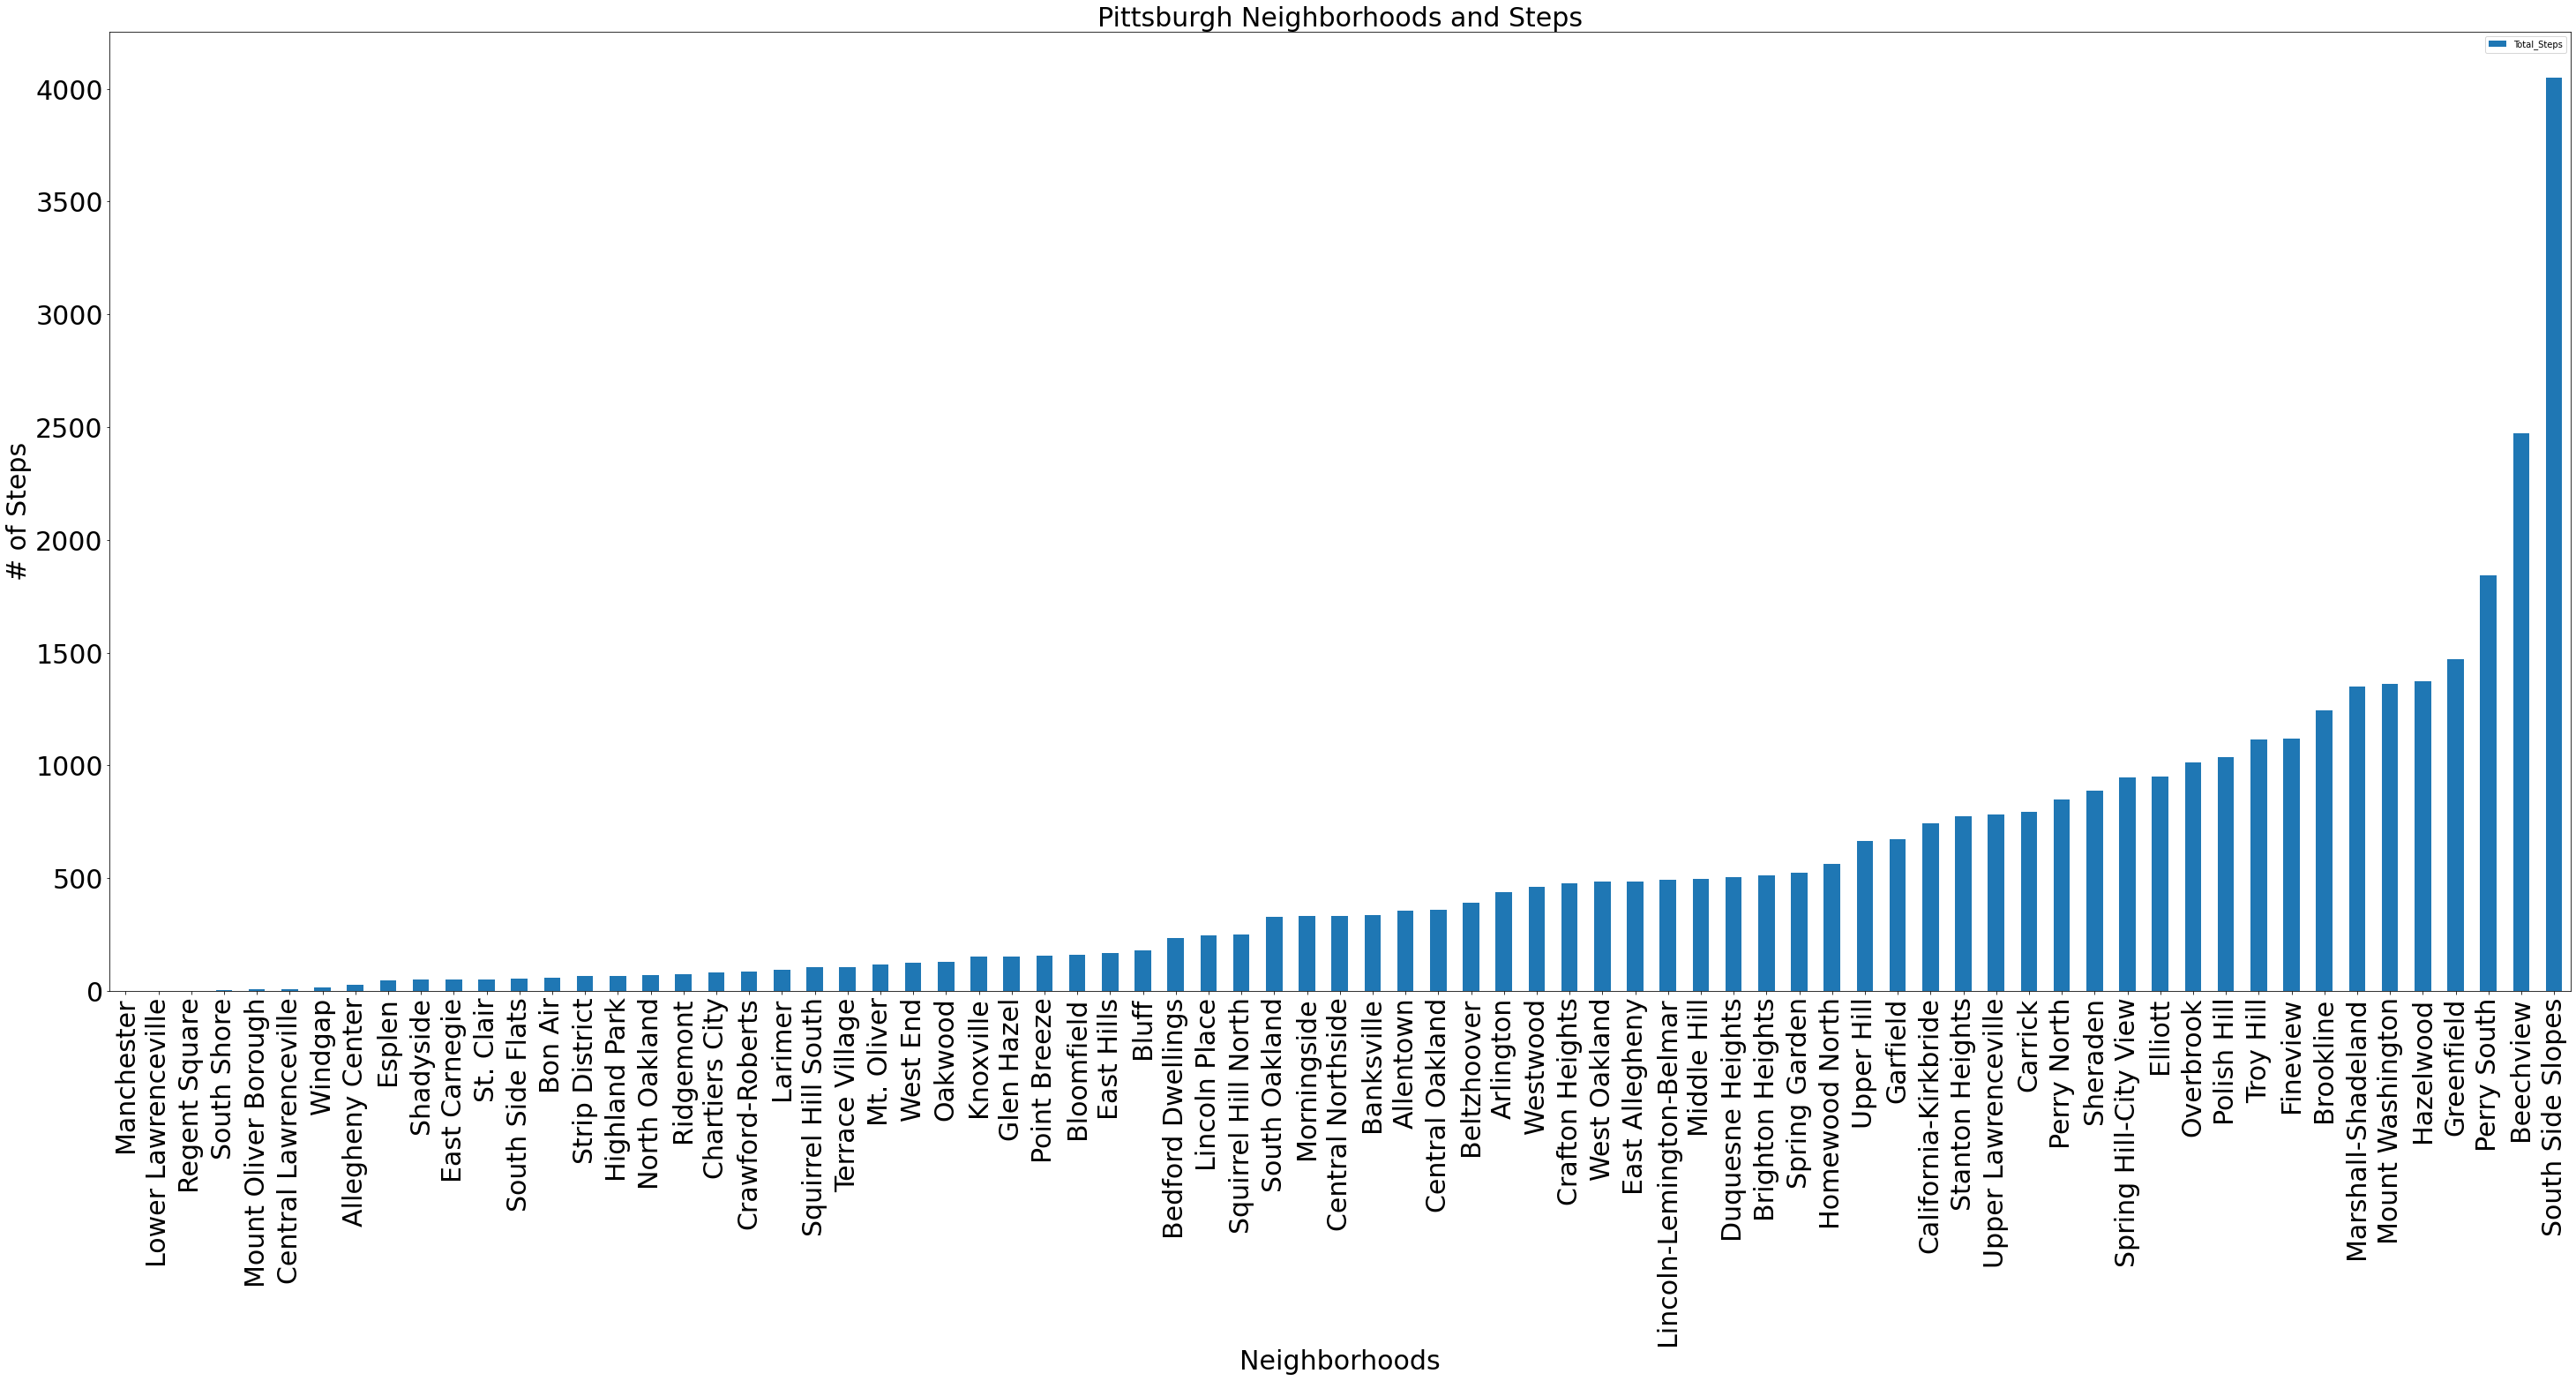

In [17]:
#Inserting Matched Data Into Data Frame
steps_data['Total_Steps'] = pd.Series(sortedSteps)
steps_data['Neighborhoods_In_Order'] = pd.Series(sortedNeigh)


#Taking Desired Columns and Creating New DataFrame
selected_columns = steps_data[['Neighborhoods_In_Order','Total_Steps']]
new_df = selected_columns.copy()


#Graph
plotData = new_df.dropna()
plotData.plot(x = 'Neighborhoods_In_Order', y = 'Total_Steps', kind = 'bar')
plt.rcParams["figure.figsize"] = (50,20)
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)
plt.title('Pittsburgh Neighborhoods and Steps', size = 30)
plt.xlabel('Neighborhoods', size = 30)
plt.ylabel('# of Steps', size = 30)

plt.show()

**Conclusion:**
The "best" neioghborhood is a three way tie between Manchester, Lower Lawrenceville, and Regent Square. If we drop those, the best would be south shore with 4 steps in total. The "worst" neighorhood was South Side Slopes by a signifcant 1500 step margin. Following was Beechview and Perry South with 2473 and 1843 respectively. In the median, Oakland as a whole. Oakland is a good center piece as it has North and South that are both in the in the upper precentiles in terms of "bestness".